In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path


In [2]:
candy_data_csv = Path("../Resources/Candy_Sales.csv")
candy_df = pd.read_csv(candy_data_csv)
candy_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [3]:
# Clean Data
#Reduced matrix for Aidan
candy_df_aidan = candy_df.loc[:, ["Product Name", "Sales", "Units", "Gross Profit", "Cost"]]
candy_df_aidan.head()

,Product Name,Sales,Units,Gross Profit,Cost
0,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [ ]:
# Visualizations (2 per question = 12)

In [ ]:
# Which Season Wins (Jose)

In [ ]:
# Trends over time (Nicholas)

In [ ]:
# Which type of candy dominates (Eric)

In [ ]:
# Regional Findings (Bianca)


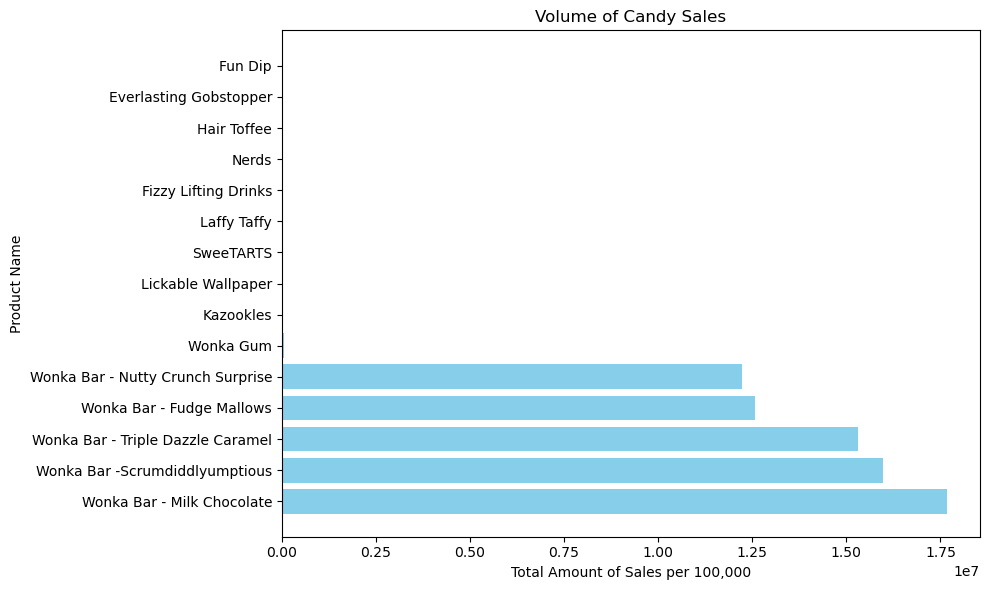

In [10]:
# Volume Vs. Cost (Aidan)

#Count total volume per product
# Count the occurrences of each product
# Assuming the column name for products is 'Product'
product_counts = candy_df_aidan['Product Name'].value_counts().reset_index()

# Rename the columns for clarity
#product_counts.columns = ['Product Name', 'Count']
product_units = candy_df_aidan.groupby('Product Name')['Units'].sum().reset_index()

# Count the occurrences of each product
product_counts = candy_df_aidan['Product Name'].value_counts().reset_index()

# Rename the columns for clarity
product_counts.columns = ['Product Name', 'Count']

# Merge the counts with the summed units
result = pd.merge(product_counts, product_units, on='Product Name')

# Calculate the total sales by multiplying Count by Units
result['Total Sales'] = result['Count'] * result['Units']

# Display the result
plt.figure(figsize=(10, 6))
plt.barh(result['Product Name'], result['Total Sales'], color='skyblue')
plt.ylabel('Product Name')
plt.xlabel('Total Amount of Sales per 100,000')
plt.title('Volume of Candy Sales')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


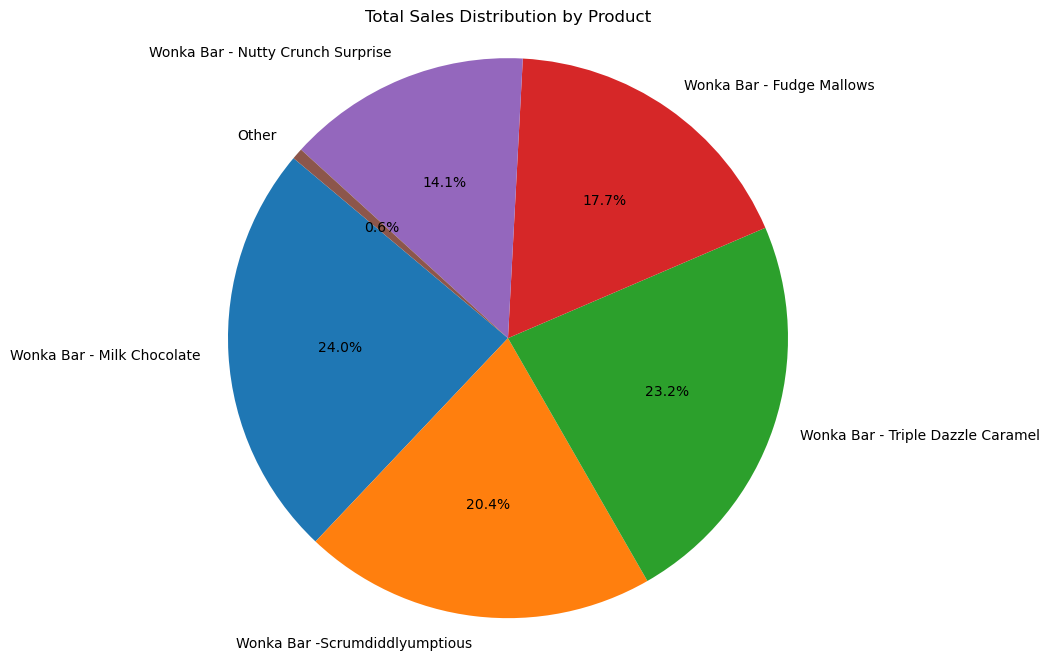

In [17]:
#visualization for dollar amount of sales per candy bar
money_counts = candy_df_aidan['Product Name'].value_counts().reset_index()
money_counts.columns = ['Product Name', 'Count']

# Calculate total units per product
units_per_product = candy_df_aidan.groupby('Product Name')['Units'].sum().reset_index()
units_per_product.columns = ['Product Name', 'Total Units']

# Assuming the column name for price is 'Price'
# Calculate total sales for each product
price_per_product = candy_df_aidan.groupby('Product Name')['Cost'].mean().reset_index()
price_per_product.columns = ['Product Name', 'Average Price']

# Merge all data together
result = pd.merge(product_counts, units_per_product, on='Product Name')
result = pd.merge(result, price_per_product, on='Product Name')

# Calculate the total sales by multiplying Count, Total Units, and Average Price
result['Total Sales'] = result['Count'] * result['Total Units'] * result['Average Price']

# Display the result
threshold = 0.05 * result['Total Sales'].sum()
other_sales = result[result['Total Sales'] < threshold]
main_sales = result[result['Total Sales'] >= threshold]

# Combine smaller slices into 'Other'
if not other_sales.empty:
    other_row = pd.DataFrame({
        'Product Name': ['Other'],
        'Total Sales': [other_sales['Total Sales'].sum()]
    })
    final_result = pd.concat([main_sales[['Product Name', 'Total Sales']], other_row], ignore_index=True)
else:
    final_result = main_sales[['Product Name', 'Total Sales']]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_result['Total Sales'], labels=final_result['Product Name'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution by Product')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
# Which Company is most successful (Yvette)